### Top N analysis
The purpose of this notebook is to identify the top e-stores that contribute to the revenue of GloboSales. In addition,  top countries for GloboSales to focus on and their top e-stores are identified. For the analysis, the rows where quantity is negative have been removed 

In [1]:
###Importing Libraries required
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [2]:
###Path for the url at which the data is saved
csv_url = "https://raw.githubusercontent.com/rohithmadupu/DevoTeam_Assignment/main/ecommerce_data.csv"

In [3]:
###reading the csv and displaying head
df_ecomm = pd.read_csv(csv_url)
df_ecomm.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id
0,2010-12-09 15:43:00,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1.0,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,20
1,2011-12-09 09:07:00,581480,23355,HOT WATER BOTTLE KEEP CALM,12.0,2011-12-09 09:07:00,4.95,14441.0,United Kingdom,20
2,2011-12-07 12:55:00,581132,NaN,NaN,4.0,2011-12-07 12:55:00,4.95,17590.0,United Kingdom,1
3,2011-06-23 14:11:00,557892,NaN,NaN,2.0,2011-06-23 14:11:00,6.35,14534.0,United Kingdom,17
4,2011-01-25 14:01:00,542115,84992,NaN,1.0,2011-01-25 14:01:00,2.08,NaN,United Kingdom,6


In [4]:
##Converting customer Id and estore ID to string
df_ecomm["CustomerID"] = df_ecomm["CustomerID"].astype("str")
df_ecomm["CustomerID"] = df_ecomm["CustomerID"].str.replace('.0', '')

df_ecomm["Estore_id"] = df_ecomm["Estore_id"].astype("str")

<ipython-input-4-4dcd4a225064>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ecomm["CustomerID"] = df_ecomm["CustomerID"].str.replace('.0', '')


In [5]:
####Checking if both Invoice Dates match and then removing one
if (df_ecomm['InvoiceDate'].equals(df_ecomm['InvoiceDate.1']) == True):
    df_ecomm = df_ecomm.drop(["InvoiceDate.1"], axis = 1)
    
###creating a datefield
df_ecomm['Date'] = pd.to_datetime(df_ecomm.InvoiceDate,errors='coerce').dt.date

df_ecomm['Year'] = pd.to_datetime(df_ecomm.InvoiceDate,errors='coerce').dt.year


In [6]:
print(df_ecomm.isnull().sum(axis=0))

InvoiceDate         0
InvoiceNo           0
StockCode      123354
Description    126307
Quantity       119574
UnitPrice           0
CustomerID          0
Country             0
Estore_id           0
Date                0
Year                0
dtype: int64


In [7]:
###Removing nulls and negative values from Quantity Column from analysis 
#Could be hindering our analysis. It could be a data quality issue 

df_ecomm_new = df_ecomm[df_ecomm['Quantity'] >= 0]

In [8]:
df_ecomm_new.head() ### 

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Estore_id,Date,Year
1,2011-12-09 09:07:00,581480,23355,HOT WATER BOTTLE KEEP CALM,12.0,4.95,14441,United Kingdom,20,2011-12-09,2011
2,2011-12-07 12:55:00,581132,NaN,NaN,4.0,4.95,175,United Kingdom,1,2011-12-07,2011
3,2011-06-23 14:11:00,557892,NaN,NaN,2.0,6.35,14534,United Kingdom,17,2011-06-23,2011
4,2011-01-25 14:01:00,542115,84992,NaN,1.0,2.08,nan,United Kingdom,6,2011-01-25,2011
5,2011-12-01 11:51:00,580024,35964,NaN,36.0,0.39,15172,United Kingdom,32,2011-12-01,2011


In [9]:
###Creating a Revenue column
df_ecomm_new["Revenue"] = df_ecomm_new.Quantity * df_ecomm_new.UnitPrice


<ipython-input-9-3ab5da0eaec6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecomm_new["Revenue"] = df_ecomm_new.Quantity * df_ecomm_new.UnitPrice


In [10]:
###Revenue by EstoreId
df_estore_rev = pd.DataFrame(df_ecomm_new.groupby(["Estore_id"]).agg({'Revenue': 'sum'}).reset_index())

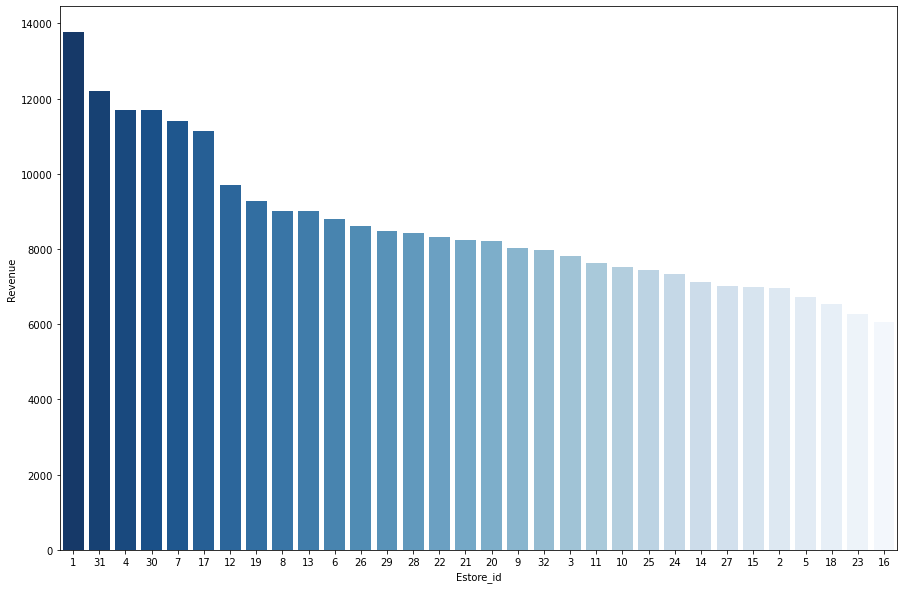

In [11]:
plt.figure(figsize = (15,10))

sns.barplot(x = 'Estore_id',
            y = 'Revenue',
            order = df_estore_rev.sort_values(['Revenue'],ascending = False).Estore_id,
            data = df_estore_rev,
            palette = 'Blues_r')
 
# Show the plot
plt.show()

###Top 5 Estores are 1,31,4,30,17

In [12]:
df = pd.DataFrame(df_estore_rev[["Revenue"]])
df.index = df_estore_rev["Estore_id"]
df = df.sort_values(by='Revenue',ascending=False)
df["cumpercentage"] = df["Revenue"].cumsum()/df["Revenue"].sum()*100
df

,Revenue,cumpercentage
Estore_id,,
1,13767.70,4.996735
31,12203.87,9.425907
4,11709.51,13.675659
30,11704.53,17.923604
7,11406.27,22.063302
17,11126.72,26.101541
12,9707.41,29.624668
19,9289.32,32.996057
8,9014.80,36.267814


<Figure size 5500x4400 with 0 Axes>

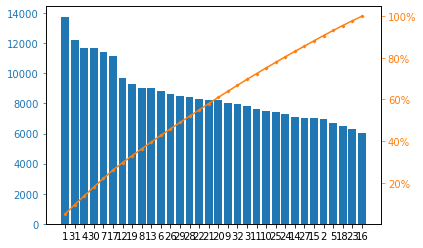

In [13]:
fig = plt.figure(figsize=(100,80), dpi=55)

fig, ax = plt.subplots()
ax.bar(df.index, df["Revenue"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=2)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")



In [14]:
###Identifyng top customers for estores 1,31,4
df_estore_cust_rev = pd.DataFrame(df_ecomm_new.groupby(["Estore_id","CustomerID"]).agg({'Revenue': 'sum'}).reset_index())

df_estore_cust_rev = df_estore_cust_rev[df_estore_cust_rev.CustomerID != "nan"]

In [47]:
###estore1
df_es1 = (
    pd.DataFrame(
    df_estore_cust_rev[df_estore_cust_rev["Estore_id"] == "1"]
    .sort_values(by='Revenue',ascending=False)[["CustomerID","Revenue","Estore_id"]]
    .head(n= 10))
)


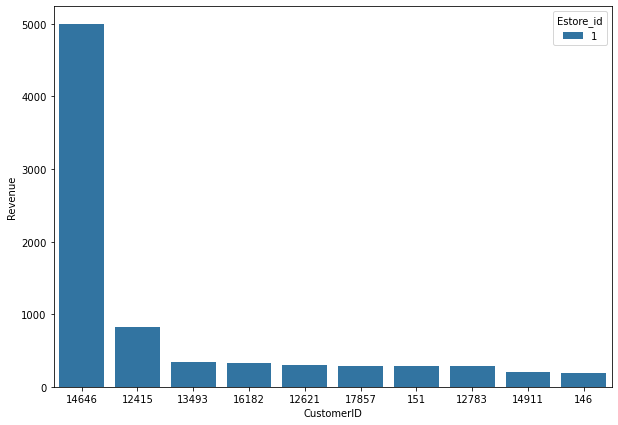

In [49]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'CustomerID',
            y = 'Revenue',
            data = df_es1,
            hue = "Estore_id")
 
# Show the plot
plt.show()


In [51]:
###estore2
df_es2 = (
    pd.DataFrame(
    df_estore_cust_rev[df_estore_cust_rev["Estore_id"] == "31"]
    .sort_values(by='Revenue',ascending=False)[["CustomerID","Revenue","Estore_id"]]
    .head(n= 10))
)



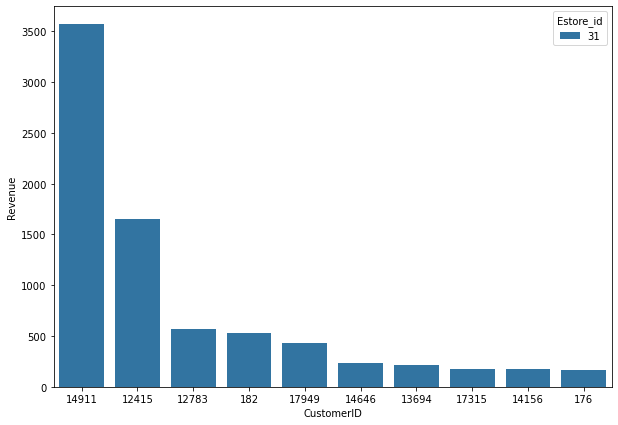

In [52]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'CustomerID',
            y = 'Revenue',
            data = df_es2,
            hue = "Estore_id")
 
# Show the plot
plt.show()


In [53]:
###estore3
df_es3 = (
    pd.DataFrame(
    df_estore_cust_rev[df_estore_cust_rev["Estore_id"] == "4"]
    .sort_values(by='Revenue',ascending=False)[["CustomerID","Revenue","Estore_id"]]
    .head(n= 10))
)



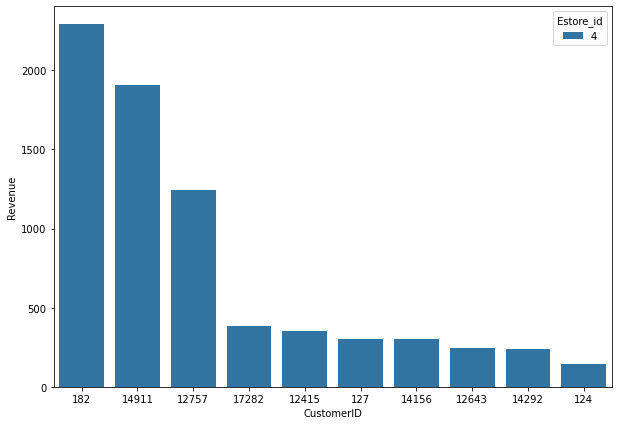

In [54]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'CustomerID',
            y = 'Revenue',
            data = df_es3,
            hue = "Estore_id")
 
# Show the plot
plt.show()


In [20]:
###Identifyng top stocks for estores 1,31,4
df_estore_stock_rev = pd.DataFrame(df_ecomm_new.groupby(["Estore_id","StockCode"]).agg({'Revenue': 'sum'}).reset_index())
df_estore_stock_rev = df_estore_stock_rev[df_estore_stock_rev.StockCode != "nan"]

In [56]:
##estore1
df_es_stk1 = (
    pd.DataFrame(
    df_estore_stock_rev[df_estore_stock_rev["Estore_id"] == "1"]
    .sort_values(by='Revenue',ascending=False)[["StockCode","Revenue","Estore_id"]]
    .head(n= 10))
)

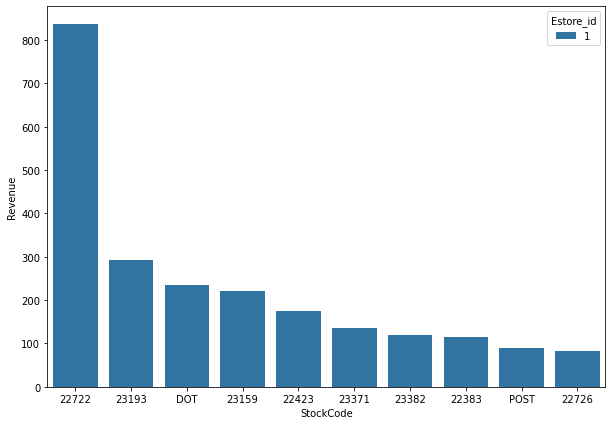

In [57]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'StockCode',
            y = 'Revenue',
            data = df_es_stk1,
            hue = "Estore_id")
 
# Show the plot
plt.show()


In [59]:
###estore2
df_es_stk2 = (
    pd.DataFrame(
    df_estore_stock_rev[df_estore_stock_rev["Estore_id"] == "31"]
    .sort_values(by='Revenue',ascending=False)[["StockCode","Revenue","Estore_id"]]
    .head(n= 10))
)

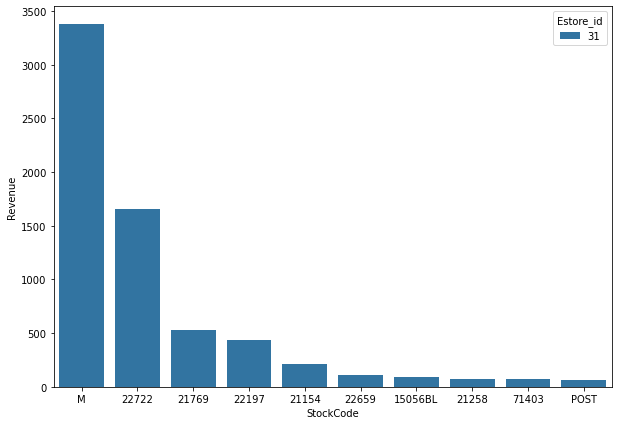

In [61]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'StockCode',
            y = 'Revenue',
            data = df_es_stk2,
            hue = "Estore_id")
 
# Show the plot
plt.show()


In [60]:
###estore3
df_es_stk3 = (
    pd.DataFrame(
    df_estore_stock_rev[df_estore_stock_rev["Estore_id"] == "4"]
    .sort_values(by='Revenue',ascending=False)[["StockCode","Revenue","Estore_id"]]
    .head(n= 10))
)

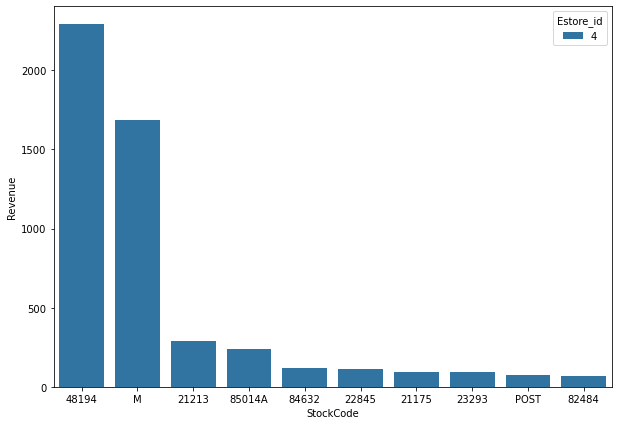

In [62]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'StockCode',
            y = 'Revenue',
            data = df_es_stk3,
            hue = "Estore_id")
 
# Show the plot
plt.show()


In [26]:
###Revenue by Country
df_country_rev = pd.DataFrame(df_ecomm_new.groupby(["Country"]).agg({'Revenue': 'sum'}).reset_index())

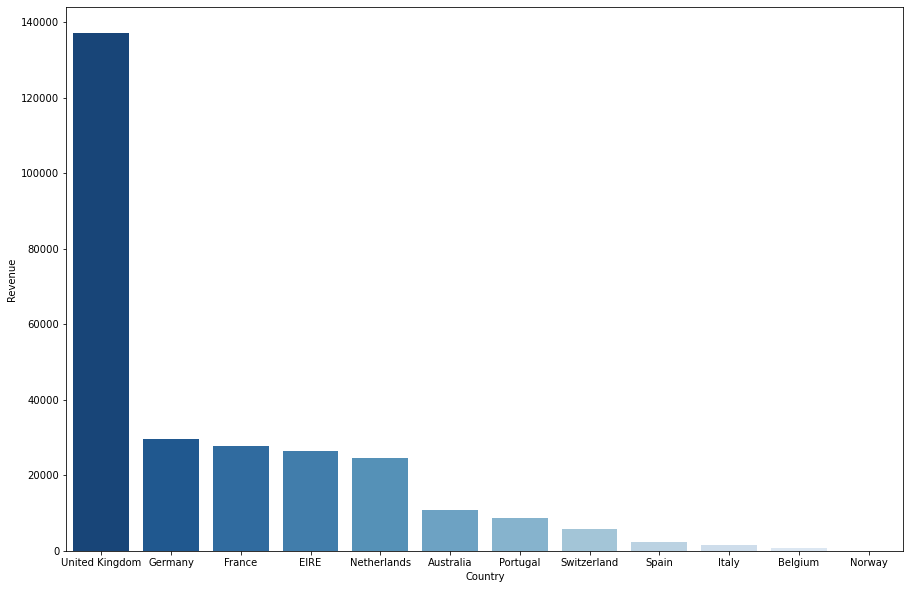

In [27]:
plt.figure(figsize = (15,10))

sns.barplot(x = 'Country',
            y = 'Revenue',
            order = df_country_rev.sort_values(['Revenue'],ascending = False).Country,
            data = df_country_rev,
            palette = 'Blues_r')
 
# Show the plot
plt.show()

###Top 5 Countries are UK,Germany,France,EIRE,Netherlands

<Figure size 1000x800 with 0 Axes>

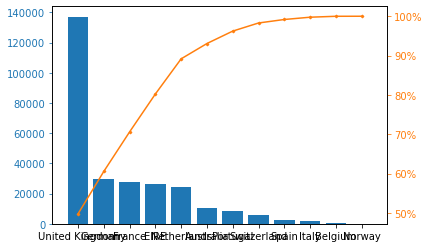

In [63]:
df_cntry = pd.DataFrame(df_country_rev[["Revenue"]])
df_cntry.index = df_country_rev["Country"]
df_cntry = df_cntry.sort_values(by='Revenue',ascending=False)
df_cntry["cumpercentage"] = df_cntry["Revenue"].cumsum()/df_cntry["Revenue"].sum()*100
df_cntry

fig = plt.figure(figsize=(10,8), dpi=100)

fig, ax = plt.subplots()
ax.bar(df_cntry.index, df_cntry["Revenue"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_cntry.index, df_cntry["cumpercentage"], color="C1", marker="D", ms=2)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

###4 Countries UK,Germany,France,EIRE are contributing to 80% revenue -> goal is to focus more on them

In [65]:
###Identifyng top 3 Estores and customers for Countries UK,Germany,France,EIRE
df_country_estore_rev = pd.DataFrame(df_ecomm_new.groupby(["Country","Estore_id"]).agg({'Revenue': 'sum'}).reset_index())

In [66]:
####Identifying top e-stores associated with each country
###United Kingdom
df_uk_estore = (
    pd.DataFrame(
    df_country_estore_rev[df_country_estore_rev["Country"] == "United Kingdom"]
    .sort_values(by='Revenue',ascending=False)[["Country","Revenue","Estore_id"]]
    .head(n= 10))
)

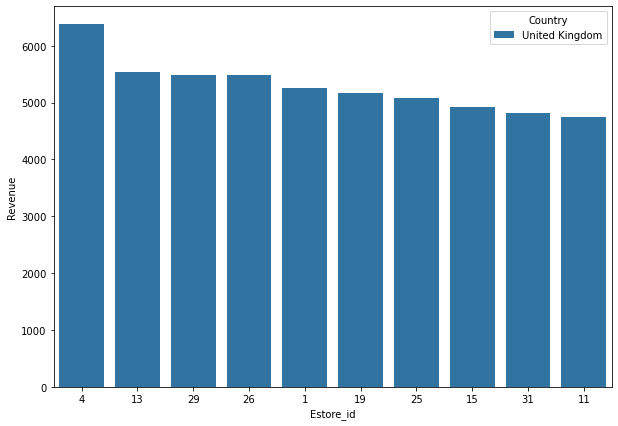

In [67]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'Estore_id',
            y = 'Revenue',
            data = df_uk_estore,
            hue = "Country")
 
# Show the plot
plt.show()


In [68]:
##Germany
df_de_estore = (
    pd.DataFrame(
    df_country_estore_rev[df_country_estore_rev["Country"] == "Germany"]
    .sort_values(by='Revenue',ascending=False)[["Country","Revenue","Estore_id"]]
    .head(n= 10))
)

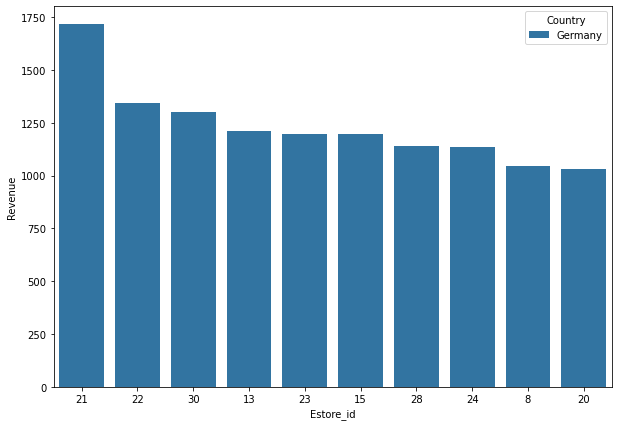

In [69]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'Estore_id',
            y = 'Revenue',
            data = df_de_estore,
            hue = "Country")
 
# Show the plot
plt.show()


In [70]:

###France
df_fr_estore = (
    pd.DataFrame(
    df_country_estore_rev[df_country_estore_rev["Country"] == "France"]
    .sort_values(by='Revenue',ascending=False)[["Country","Revenue","Estore_id"]]
    .head(n= 10))
)

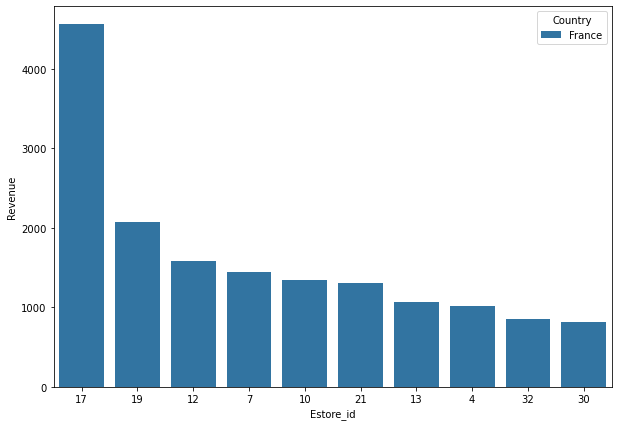

In [71]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'Estore_id',
            y = 'Revenue',
            data = df_fr_estore,
            hue = "Country")
 
# Show the plot
plt.show()


In [72]:

###EIRE
df_ir_estore = (
    pd.DataFrame(
    df_country_estore_rev[df_country_estore_rev["Country"] == "EIRE"]
    .sort_values(by='Revenue',ascending=False)[["Country","Revenue","Estore_id"]]
    .head(n= 10))
)

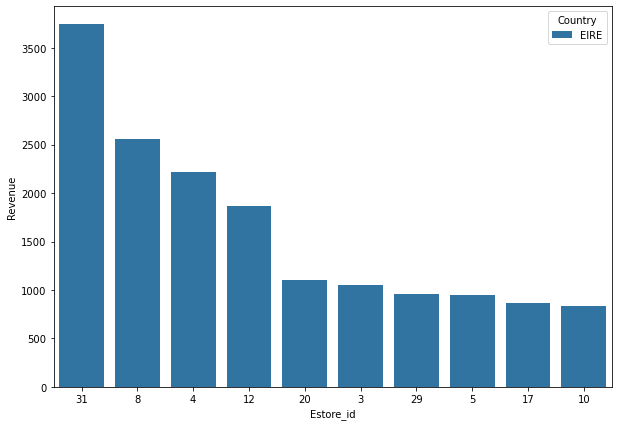

In [73]:
plt.figure(figsize = (10,7))

sns.barplot(x = 'Estore_id',
            y = 'Revenue',
            data = df_ir_estore,
            hue = "Country")
 
# Show the plot
plt.show()
